In [74]:
pip install pycryptodome

In [75]:
# Library import
import cv2
import string
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import hashlib
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def derive_key(userkey):
  return hashlib.sha256(userkey.encode()).digest()[:16]

In [77]:
# Encryption Statement
def encrypt_message(msg,userkey):
  key=derive_key(userkey)
  cipher=AES.new(key,AES.MODE_CBC)
  ct=cipher.encrypt(pad(msg.encode(), AES.block_size))
  return cipher.iv + ct

In [78]:
# Decryption Statement
def decrypt_message(cipher_bytes, userkey):
  key=derive_key(userkey)
  iv=cipher_bytes[:16]
  ct=cipher_bytes[16:]
  cipher=AES.new(key,AES.MODE_CBC,iv)
  return unpad(cipher.decrypt(ct),AES.block_size).decode()

In [79]:
d={}
c={}
for i in range(256):
  d[chr(i)]=i
  c[i]=chr(i)

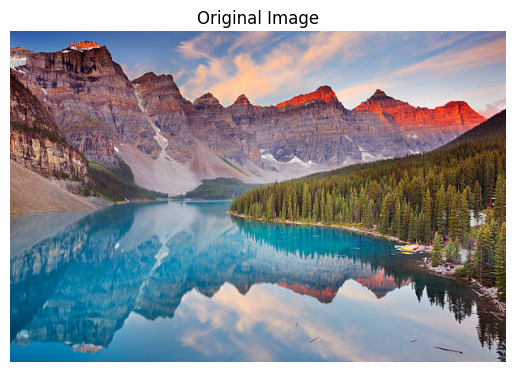

In [80]:
# Image Add
x=cv2.imread(r"/content/istockphoto-471926619-612x612.jpg")
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [81]:
key="546"
text="This is highly encryped method in Stegnography"

In [82]:
encrypted_bytes=encrypt_message(text,key)
l=len(encrypted_bytes)
print(l)

64


In [83]:
# Encryption Process
x_enc=x.copy()
n=0
m=0
z=0
kl=0
for i in range(l):
  x_enc[n,m,z]=encrypted_bytes[i]^d[key[kl]]
  z=(z+1)%3
  if z==0:
    m+=1
    if m==x.shape[1]:
      m=0
      n+=1
  kl=(kl+1)%len(key)

In [84]:
cv2.imwrite("encrypting.jpg",x)
os.system("encrypting.jpg")
print("Successfuly Encrypted")

Successfuly Encrypted


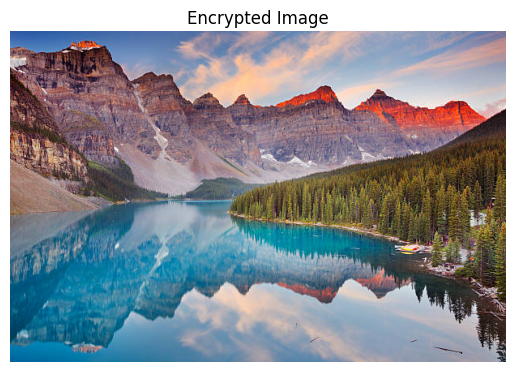

In [85]:
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Encrypted Image")
plt.show()

In [86]:
# Decryption Process
n,m,z=0,0,0
kl=0
key1=input("renter key :- ")
if key==key1:
  encrypted_back=bytearray()
  for i in range(l):
    encrypted_back.append(x_enc[n,m,z]^d[key[kl]])
    z=(z+1)%3
    if z==0:
     m+=1
     if m==x.shape[1]:
      m=0
      n+=1
    kl=(kl+1)%len(key)
  decrypted=decrypt_message(bytes(encrypted_back),key)
  print(decrypted)
else:
 print("Key Mismatch")

renter key :- 546
This is highly encryped method in Stegnography
